# EQUITY CHOOSER OPTION - VALUATION AND RISK ANALYSIS

Valuation and Risk of Equity Chooser Options in which the option is on a basket of stocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
#  FINANCEPY BETA Version 0.350 - This build: 30 Apr 2024 at 21:20 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Chooser Option

All the assets in the basket have the same characteristicsm

In [3]:
chooseDate = Date(31, 8, 2007)    

In [4]:
call_expiry_dt = Date(2, 12, 2007)
put_expiry_dt = Date(2, 12, 2007) 

In [5]:
call_strike = 60.0
put_strike = 60.0

In [6]:
chooserOption = EquityChooserOption(chooseDate, call_expiry_dt, put_expiry_dt, call_strike, put_strike)

In [7]:
print(chooserOption)

OBJECT TYPE: EquityChooserOption
CHOOSER DATE: 31-AUG-2007
CALL EXPIRY DATE: 02-DEC-2007
CALL STRIKE PRICE: 60.0
PUT EXPIRY DATE: 02-DEC-2007
PUT STRIKE PRICE: 60.0


## Valuation

In [8]:
value_dt = Date(1, 6, 2007)

In [9]:
interest_rate = 0.10

In [10]:
discount_curve = DiscountCurveFlat(value_dt, interest_rate)

In [11]:
volatility = 0.20

In [12]:
model = BlackScholes(volatility)

In [13]:
stock_price = 50.0
dividend_yield = 0.05

In [14]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

In [15]:
chooserOption.value(value_dt, stock_price, discount_curve, dividend_curve, model)

8.931595212089938

## Monte-Carlo Analysis

In [16]:
num_steps = np.linspace(2000,50000,20)

In [17]:
values = []
values_mc = []
for n in num_steps:
    v = chooserOption.value(value_dt, stock_price, discount_curve, dividend_curve, model)
    v_mc = chooserOption.value_mc(value_dt, stock_price, discount_curve, dividend_curve, model, int(n))
    values.append(v)
    values_mc.append(v_mc)

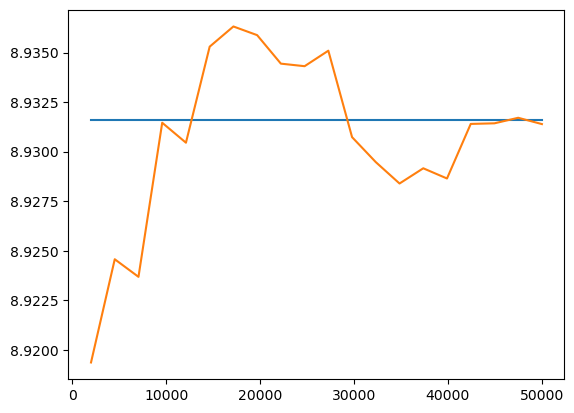

In [18]:
plt.plot(num_steps, values);
plt.plot(num_steps, values_mc);

If the option is all European then we get a flat line. If not, we use the binomial tree and get the price to 4 significant figures with 2000 steps.

## Risk Sensitivities

The analytical model produced the following sensitivities

In [19]:
chooserOption.delta(value_dt, stock_price, discount_curve, dividend_curve, model)

-0.7663737245877655

In [20]:
chooserOption.gamma(value_dt, stock_price, discount_curve, dividend_curve, model)

0.05646754175359092

In [21]:
chooserOption.theta(value_dt, stock_price, discount_curve, dividend_curve, model)

-0.004123476471278309

In [22]:
chooserOption.vega(value_dt, stock_price, discount_curve, dividend_curve, model)

0.11548275604736347

In [23]:
chooserOption.rho(value_dt, stock_price, discount_curve, dividend_curve, model)

-23.81699666820225

Copyright (c) 2020 Dominic O'Kane